In [16]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
# import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
# !pip install nltk
import nltk 
# !python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
# nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

2023-06-14 23:19:12.253044: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [2]:
import en_core_web_lg

In [3]:
df = pd.read_csv('netflix_titles.csv')

# K_Means clustering

In this section, I will use the cast, director, countries, rating and listed_in feature to cluster movie/Tv-shows.
The purpose of this clustering is to recommend related movies/Tv-Show which simmilar to given movie

In [74]:
df = pd.read_csv("netflix_titles.csv")

The first step is to encoding these feature using one-hot-encoding and MultiLabelBinazier. 

In [106]:
df_reduced = df[['type', 'country', 'title', 'rating', 'listed_in', 'description']]
df_reduced

,type,country,title,rating,listed_in,description
0,Movie,United States,Dick Johnson Is Dead,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,South Africa,Blood & Water,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,NaN,Ganglands,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,NaN,Jailbirds New Orleans,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,India,Kota Factory,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...
8802,Movie,United States,Zodiac,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,NaN,Zombie Dumb,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,United States,Zombieland,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,United States,Zoom,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [107]:
df_reduced['listed_in'] = df_reduced['listed_in'].str.replace("  "," ").str.split(', ').to_list()

In [108]:
df_reduced

,type,country,title,rating,listed_in,description
0,Movie,United States,Dick Johnson Is Dead,PG-13,[Documentaries],"As her father nears the end of his life, filmm..."
1,TV Show,South Africa,Blood & Water,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,TV Show,NaN,Ganglands,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,TV Show,NaN,Jailbirds New Orleans,TV-MA,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,India,Kota Factory,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...
8802,Movie,United States,Zodiac,R,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,TV Show,NaN,Zombie Dumb,TV-Y7,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,Movie,United States,Zombieland,R,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,Movie,United States,Zoom,PG,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [109]:
mlb = MultiLabelBinarizer()

In [93]:
l = pd.DataFrame(mlb.fit_transform(df_reduced.listed_in), columns = mlb.classes_, index = df_reduced.index)
l.shape

(8807, 42)

In [94]:
l.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [110]:
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = df_reduced.join(pd.DataFrame(mlb.fit_transform(df_reduced.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=df_reduced.index))
mlb_df.shape

(8807, 47)

In [104]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df_reduced[['rating']]), columns = ohe.categories_, index= df_reduced.index)

In [111]:
mlb_df = mlb_df.join(ohe_df)

In [112]:
mlb_df

,type,country,title,rating,description,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,...,"(R,)","(TV-14,)","(TV-G,)","(TV-MA,)","(TV-PG,)","(TV-Y,)","(TV-Y7,)","(TV-Y7-FV,)","(UR,)","(nan,)"
0,Movie,United States,Dick Johnson Is Dead,PG-13,"As her father nears the end of his life, filmm...",0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TV Show,South Africa,Blood & Water,TV-MA,"After crossing paths at a party, a Cape Town t...",0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TV Show,NaN,Ganglands,TV-MA,To protect his family from a powerful drug lor...,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TV Show,NaN,Jailbirds New Orleans,TV-MA,"Feuds, flirtations and toilet talk go down amo...",0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TV Show,India,Kota Factory,TV-MA,In a city of coaching centers known to train I...,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,United States,Zodiac,R,"A political cartoonist, a crime reporter and a...",0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8803,TV Show,NaN,Zombie Dumb,TV-Y7,"While living alone in a spooky town, a young g...",0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8804,Movie,United States,Zombieland,R,Looking to survive in a world taken over by zo...,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8805,Movie,United States,Zoom,PG,"Dragged from civilian life, a former superhero...",0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Count encode director, cast, and country columns
count_encoded = le.fit_transform(df_reduced[['country']])
netflix_encoded_df = mlb_df.join(pd.DataFrame(count_encoded, columns=['country'], index=mlb_df.index))

In [127]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df_reduced[['type']]), columns = ohe.categories_, index= df_reduced.index)
netflix_encoded_df = netflix_encoded_df.join(ohe_df)

In [129]:
netflix_encoded_df = netflix_encoded_df.drop(['type','title', 'country','rating','description'], axis=1)
netflix_encoded_df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,"(TV-G,)","(TV-MA,)","(TV-PG,)","(TV-Y,)","(TV-Y7,)","(TV-Y7-FV,)","(UR,)","(nan,)","(Movie,)","(TV Show,)"
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
# Create K-Means Model
modelkmeans = KMeans(n_clusters=500, init='k-means++', n_init=10).fit(netflix_encoded_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

In [134]:
df = df.join(predictions_df)

In [138]:
cluster_num = df[df['title'] == 'Breaking Bad'].cluster.item()
df[df['cluster']==cluster_num]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
678,s679,TV Show,The Assassination of Gianni Versace,NaN,"Edgar Ramírez, Darren Criss, Ricky Martin, Pen...",United States,"June 19, 2021",2018,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Thrillers","Defining moments in Andrew Cunanan's life, sta...",422
1477,s1478,TV Show,Dare Me,NaN,"Willa Fitzgerald, Herizen Guardiola, Marlo Kel...",United States,"December 30, 2020",2019,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Thrillers",Relationships topple and loyalties flip when a...,422
2767,s2768,TV Show,Ozark,NaN,"Jason Bateman, Sofia Hublitz, Laura Linney, Sk...",United States,"March 27, 2020",2020,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A financial adviser drags his family from Chic...,422
3762,s3763,TV Show,Designated Survivor,NaN,"Kiefer Sutherland, Natascha McElhone, Maggie Q...",United States,"June 7, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",America's fate rests in the hands of a low-lev...,422
5940,s5941,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,422


In [151]:
df_text = df['listed_in'] + ' '+ df['description']

In [152]:
df_text

0       Documentaries As her father nears the end of h...
1       International TV Shows, TV Dramas, TV Mysterie...
2       Crime TV Shows, International TV Shows, TV Act...
3       Docuseries, Reality TV Feuds, flirtations and ...
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802    Cult Movies, Dramas, Thrillers A political car...
8803    Kids' TV, Korean TV Shows, TV Comedies While l...
8804    Comedies, Horror Movies Looking to survive in ...
8805    Children & Family Movies, Comedies Dragged fro...
8806    Dramas, International Movies, Music & Musicals...
Length: 8807, dtype: object

In [17]:
#fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text
     

In [154]:
df_text_cleaned = df_text.apply(clean_text)

In [157]:
df_text_cleaned[0]

'Documentaries father nears life filmmaker Kirsten Johnson stage death inventive comical way help face inevitable'

Apply TfidfVectorizer

In [169]:
vect =TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text=vect.fit_transform(df_text_cleaned)


In [172]:
print(vect)

TfidfVectorizer(max_features=1000,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})


In [182]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get) # sort by weight value
print(l[0],l[-1])
# print(dd['international'])
# print(dd['bear']) 
print(dd['shark'])
print(dd['movies'])

movies shark
6.947921462473366
1.6709165581009442


## Topic modeling with description

# Clustering

In [196]:
df['director'] = df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna('unknown')
df['country'] = df['country'].fillna('United States')

In [197]:
df_clustering = df['director']+" " + df['cast'] +" "+ df['country'] +" "+ df['listed_in'] +" "+ df['description']

In [198]:
df_clustering

0       Kirsten Johnson unknown United States Document...
1       unknown Ama Qamata, Khosi Ngema, Gail Mabalane...
2       Julien Leclercq Sami Bouajila, Tracy Gotoas, S...
3       unknown unknown United States Docuseries, Real...
4       unknown Mayur More, Jitendra Kumar, Ranjan Raj...
                              ...                        
8802    David Fincher Mark Ruffalo, Jake Gyllenhaal, R...
8803    unknown unknown United States Kids' TV, Korean...
8804    Ruben Fleischer Jesse Eisenberg, Woody Harrels...
8805    Peter Hewitt Tim Allen, Courteney Cox, Chevy C...
8806    Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra...
Length: 8807, dtype: object

In [208]:
import unicodedata
my_var = "this is a string'''''."
my_var2 = " Esta es una oración que está en español "
my_var3 = unicodedata.normalize('NFKD', my_var2).encode('ascii', 'ignore').decode('ascii')
output = my_var + my_var3
print(output)

this is a string'''''. Esta es una oracion que esta en espanol 


In [209]:
import string
translator = str.maketrans('', '', string.punctuation)
my_var.translate(translator)

'this is a string'

In [14]:
import string
translator = str.maketrans('', '', string.punctuation)
def clean_text(text):
    # remove non- ASCII character
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    # lower_case, remove puntuation
    text = text.lower().translate(translator)
    # split word into token
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    # remove stop word
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [211]:
df_cluster_cleaned = df_clustering.apply(clean_text)

In [213]:
df_cluster_cleaned

0       kirsten johnson unknown united state documenta...
1       unknown qamata khosi ngema gail mabalane thaba...
2       julien leclercq sami bouajila tracy gotoas sam...
3       unknown unknown united state docuseries realit...
4       unknown mayur jitendra kumar ranjan alam khan ...
                              ...                        
8802    david fincher mark ruffalo jake gyllenhaal rob...
8803    unknown unknown united state kid korean show c...
8804    ruben fleischer jesse eisenberg woody harrelso...
8805    peter hewitt allen courteney chevy chase kate ...
8806    mozez singh vicky kaushal sarahjane dia raagha...
Length: 8807, dtype: object

In [215]:
vect =TfidfVectorizer(stop_words=STOPWORDS,max_features=20000)
vect_text=vect.fit_transform(df_cluster_cleaned)


In [217]:
vect_text.shape

(8807, 20000)

### Dimension reduction through PCA

In [221]:
pca =PCA()
vect_arr= vect_text.toarray()

In [223]:
vect_arr[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [224]:
pca.fit(vect_arr)

PCA()

Text(0, 0.5, 'cumulative explained variance')

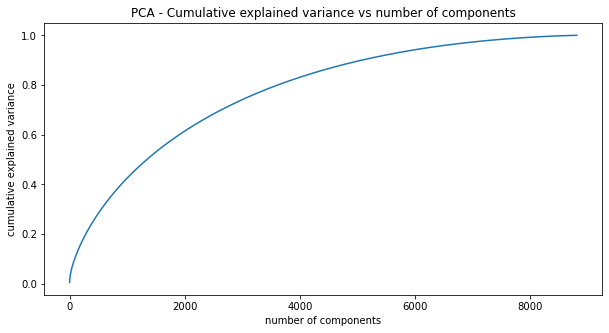

In [225]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [228]:
pca = PCA(n_components=4000)
vect_reduced = pca.fit_transform(vect_arr)

Visualize the elbow curl to choose best K and silhouette score

In [48]:
scores = []
silhouette_scores = []
for n in range(2,20):
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10)
    kmeans.fit(vect_reduced)
    scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(vect_arr, kmeans.labels_))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,31), scores)


NameError: name 'vect_reduced' is not defined

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,31), silhouette_scores)


### Analyze The Cluster

In [234]:
n=6
kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10)
kmeans.fit(vect_reduced)
df['cluster'] = kmeans.labels_

In [253]:
df.to_csv('result_cluster.csv')

In [10]:
import pandas as pd
df = pd.read_csv('result_cluster.csv')

In [10]:
df.pop(df.columns.values[0])

0          0
1          1
2          2
3          3
4          4
        ... 
8802    8802
8803    8803
8804    8804
8805    8805
8806    8806
Name: Unnamed: 0, Length: 8807, dtype: int64

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='cluster'>

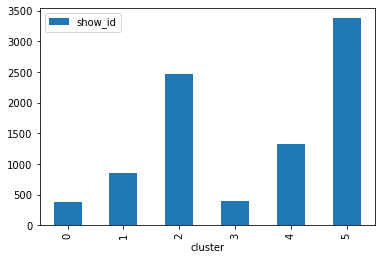

In [69]:
df.groupby('cluster').count().reset_index().iloc[:,:2].plot(x='cluster', y='show_id', kind='bar')

/var/folders/rq/jntjfmqj7ll35dkgj80tqf4c0000gn/T/ipykernel_41299/4142053726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['listed_in'] = df_1['listed_in'].str.split(', ').to_list()


<AxesSubplot:xlabel='listed_in'>

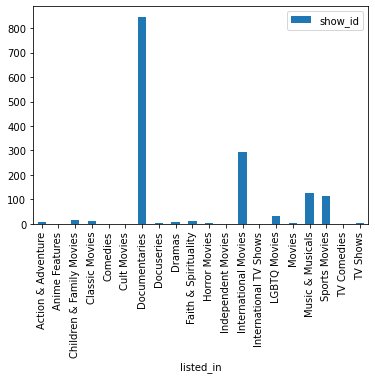

In [12]:
df_1 = df[df['cluster']==1]
df_1['listed_in'] = df_1['listed_in'].str.split(', ').to_list()
df_1.explode('listed_in').groupby('listed_in').count().reset_index().iloc[:,:2].plot(x='listed_in', y='show_id', kind='bar')

In the first cluster, it seems to belong to Documentaries

<AxesSubplot:xlabel='description'>

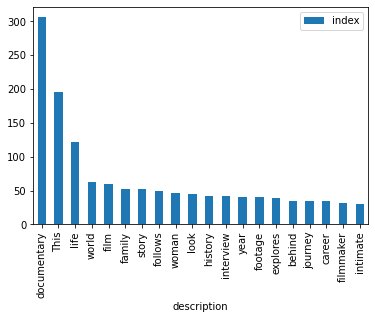

In [18]:
pd.DataFrame(df_1['description'].apply(clean_text).str.split(' ').explode()).reset_index() \
.groupby('description').count().reset_index().sort_values(by='index',ascending=False, ignore_index=True).iloc[:20]\
.plot(x='description', y='index', kind='bar')

I took the most frequent word from the cleaned discription column. It seems like the documentary is making about the life of someone which their carrer is about music and sport that impacted the world. Some documentary choose interview kind. It also make about history documentary or explores 

In [41]:
def is_in(x):
    print(x)
    for m in x['listed_in']:
        if m== "Music & Musicals":
            return True
    return False

In [47]:
d = df_1.explode('listed_in')
d[d['listed_in']=='Music & Musicals'].iloc[:5]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,Music & Musicals,"Using interviews and archival footage, this do...",1
170,s171,Movie,Rhyme & Reason,Peter Spirer,"Too $hort, B-Real, Kurtis Blow, Da Brat, Grand...",United States,"September 1, 2021",1997,R,89 min,Music & Musicals,The world and culture of rap song topics such ...,1
233,s234,Movie,Count Me In,Mark Lo,unknown,United Kingdom,"August 24, 2021",2021,TV-MA,82 min,Music & Musicals,This documentary features some of rock's great...,1
455,s456,Movie,Emicida: AmarElo - Live in São Paulo,Fred Ouro Preto,Emicida,United States,"July 15, 2021",2021,TV-MA,100 min,Music & Musicals,Brazilian rapper Emicida brings his progressiv...,1
770,s771,Movie,Myriam Fares: The Journey,Myriam Fares,Myriam Fares,United Arab Emirates,"June 3, 2021",2021,TV-14,72 min,Music & Musicals,"From pregnancy to album preparations, Lebanese...",1


Rhyme & Reason is a 1997 documentary film about rap and hip hop. Documentary filmmaker Peter Spirer interviewed over 80 significant artists in rap and hip hop music

<AxesSubplot:xlabel='listed_in'>

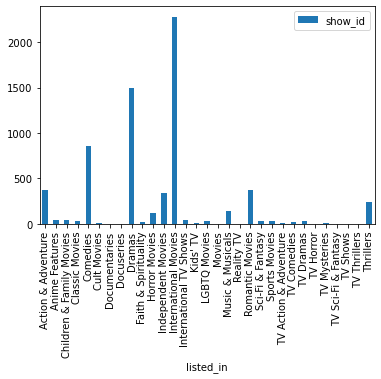

In [66]:
df_2 = df[df['cluster']==2]
df_2['listed_in']= df_2['listed_in'].str.split(', ').to_list()#.explode('listed_in')
df_2.explode('listed_in').groupby('listed_in').count().reset_index().iloc[:,:2].plot(x='listed_in', y='show_id', kind='bar')

For international movies, we can see that most international movie belong to drama, comedies, A&A and romantic movies.
This group is also has the most movies compare to other cluster

In [70]:
def plot(c):
    df_2 = df[df['cluster']==c]
    df_2['listed_in']= df_2['listed_in'].str.split(', ').to_list()#.explode('listed_in')
    df_2.explode('listed_in').groupby('listed_in').count().reset_index().iloc[:,:2].plot(x='listed_in', y='show_id', kind='bar')

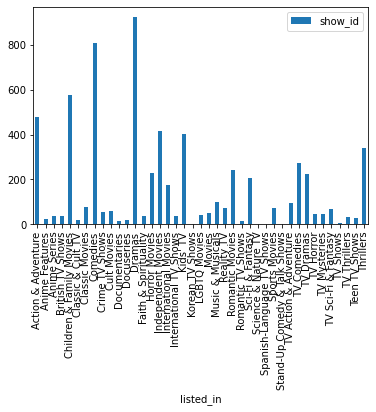

In [71]:
plot(5)

In group 5, Drama movie go with Comedies. Related to these is about Family and chidlren, action and adventure.

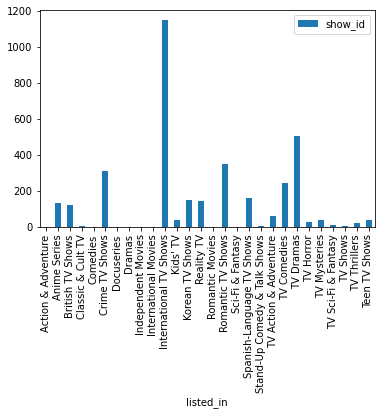

In [73]:
plot(4)

In the International TV-Show verse, which mostly making about Romantic movies and Dramas